In [1]:
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import audio
import os


In [3]:
sample_dir = 'samples'

samples = []
for filename in [f for f in os.listdir('samples') if f.endswith('.aif') or f.endswith('.wav')]:
    sample = audio.load_sample(os.path.join(sample_dir, filename))
    samples.append(sample)

audio.info_grid(samples)

,name,samples,duration,peak,rms,loudness
0,samples/Taylor piezo 0001 [2024-01-01 134524].aif,1152000,24.00000,0.884622,0.100226,-19.231330
1,samples/Eastman mic 0008 [2023-12-30 161423].aif,768000,16.00000,0.281032,0.036721,-29.783635
2,samples/Eastman mic 0006 [2023-12-30 161352].aif,768000,16.00000,0.083417,0.015638,-37.244074
3,samples/Eastman mic 0009 [2023-12-30 162118].aif,768000,16.00000,0.343065,0.042430,-28.412893
4,samples/Eastman piezo 0010 [2024-01-01 132751]...,4128000,86.00000,0.742755,0.067436,-22.413924
5,samples/Eastman piezo 0005 [2023-12-30 160551]...,768000,16.00000,0.332617,0.049556,-26.683516
6,samples/Cordoba pickup 0001 [2024-01-01 141947...,4512000,94.00000,0.504333,0.036160,-28.057851
7,samples/Norman piezo 0003 [2024-01-01 134007].aif,3936000,82.00000,0.417154,0.032251,-28.608283
8,samples/Taylor piezo 0002 [2024-01-01 134924].aif,3552000,74.00000,0.919105,0.071420,-21.255997
9,samples/Norman Mic 0003 [2024-01-01 134007].aif,3936000,82.00000,1.000000,0.111086,-18.408194


In [8]:
sample = samples[4]

In [9]:
sample.info()

name        samples/Eastman piezo 0010 [2024-01-01 132751]...
samples                                               4128000
duration                                                 86.0
peak                                                 0.742755
rms                                                  0.067436
loudness                                           -22.413924
dtype: object

In [10]:
from visualise import plot_signal

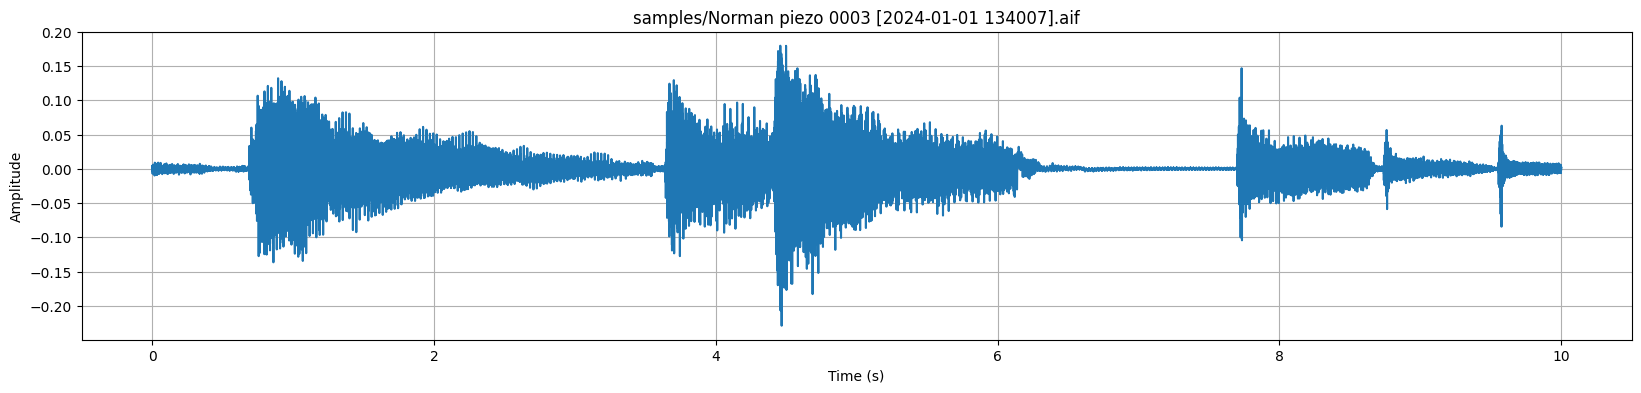

In [54]:
plot_signal(sample,start=audio.duration_to_samples(44, sample.sr), length=audio.duration_to_samples(10, sample.sr))

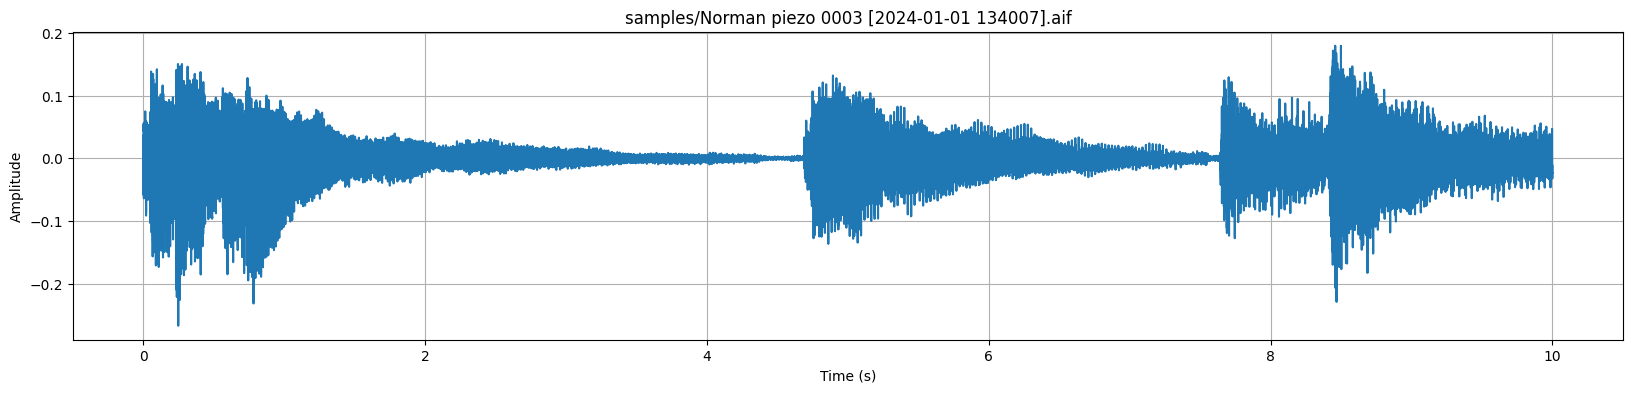

In [43]:
plot_signal(sample, start=audio.duration_to_samples(40, sample.sr), length=audio.duration_to_samples(10, sample.sr))

In [15]:
sample.loudness

-22.41392355546505

In [29]:
slices = sample.slices(1.0, overlap=0)
df = audio.info_grid(slices)
df


,name,samples,duration,peak,rms,loudness
0,samples/Norman piezo 0003 [2024-01-01 134007]....,48000,1.0,0.005579,0.001745,-61.119673
1,samples/Norman piezo 0003 [2024-01-01 134007]....,48000,1.0,0.002404,0.001185,-63.079814
2,samples/Norman piezo 0003 [2024-01-01 134007]....,48000,1.0,0.001852,0.001119,-63.507865
3,samples/Norman piezo 0003 [2024-01-01 134007]....,48000,1.0,0.165480,0.028825,-29.930433
4,samples/Norman piezo 0003 [2024-01-01 134007]....,48000,1.0,0.171083,0.034062,-29.384960
...,...,...,...,...,...,...
77,samples/Norman piezo 0003 [2024-01-01 134007]....,48000,1.0,0.033142,0.009671,-41.692267
78,samples/Norman piezo 0003 [2024-01-01 134007]....,48000,1.0,0.025141,0.006688,-44.561256
79,samples/Norman piezo 0003 [2024-01-01 134007]....,48000,1.0,0.012807,0.004503,-47.815010
80,samples/Norman piezo 0003 [2024-01-01 134007]....,48000,1.0,0.009657,0.003064,-52.089523


In [30]:
df.rms.max() / df.rms.min()

49.81646196443372

In [36]:
len([s for s in slices if s.peak > 0.05 * df.peak.max()]) / len(slices)

0.8902439024390244

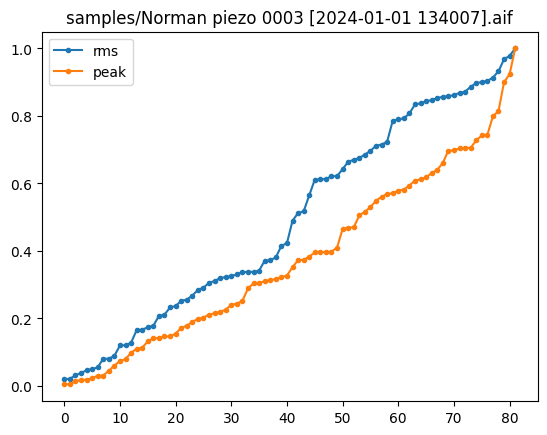

In [37]:
plt.title(sample.name)
plt.plot( np.array(sorted([s.rms for s in slices]))/df.rms.max(), '.-', label='rms')
plt.plot( np.array(sorted([s.peak for s in slices]))/df.peak.max(), '.-', label='peak')
plt.legend()

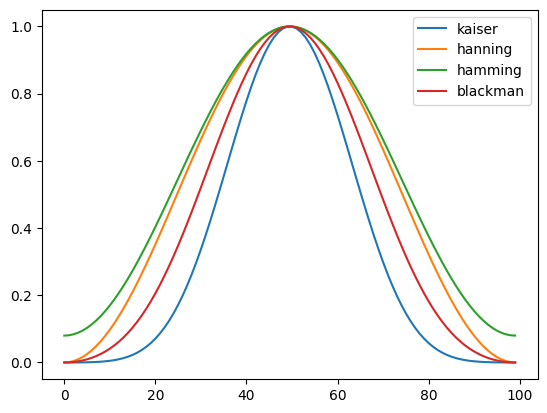

In [38]:
plt.plot(np.kaiser(100, 14), label='kaiser')
plt.plot(np.hanning(100), label='hanning')
plt.plot(np.hamming(100), label='hamming')
plt.plot(np.blackman(100), label='blackman')
plt.legend()

In [39]:
slice = slices[8]

In [40]:
slice

[samples/Norman piezo 0003 [2024-01-01 134007].aif   9/82 48000khz 1.00s]

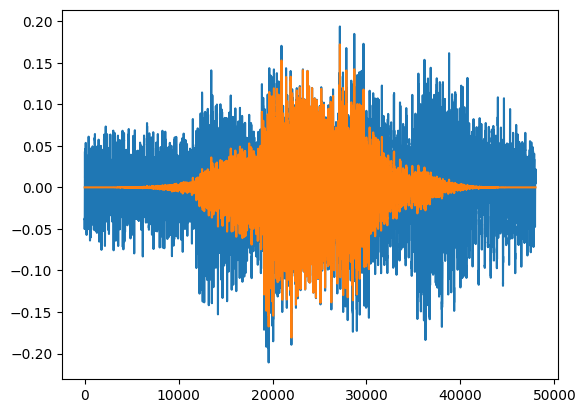

In [41]:
plt.plot(slice.signal)
plt.plot(slice.signal * np.kaiser(len(slice.signal),14))


In [27]:
sample

[samples/Eastman piezo 0010 [2024-01-01 132751].aif 48000khz 86.00s]

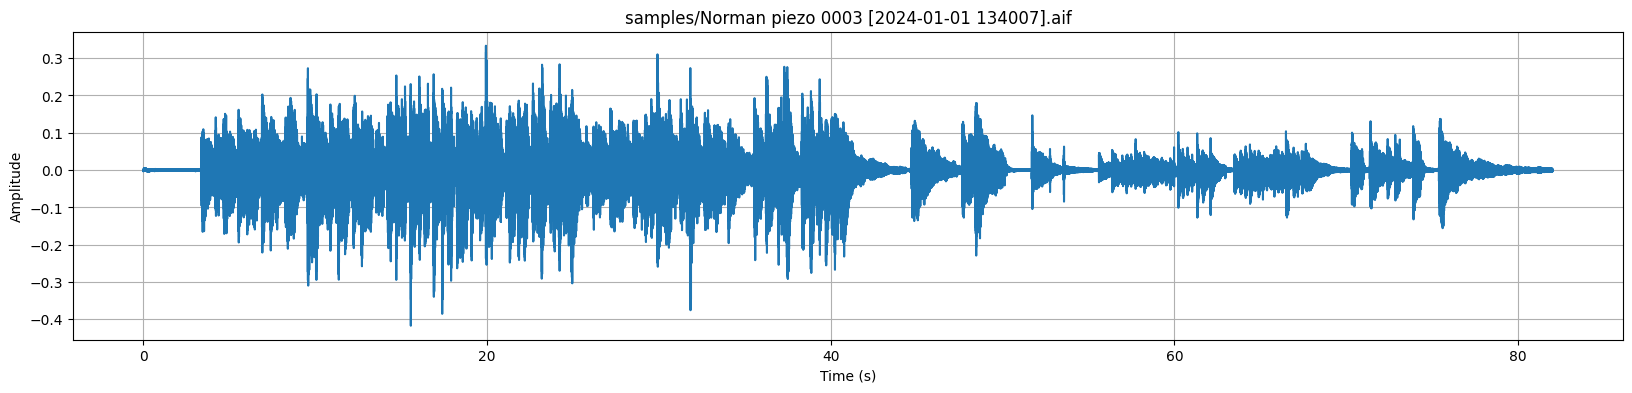

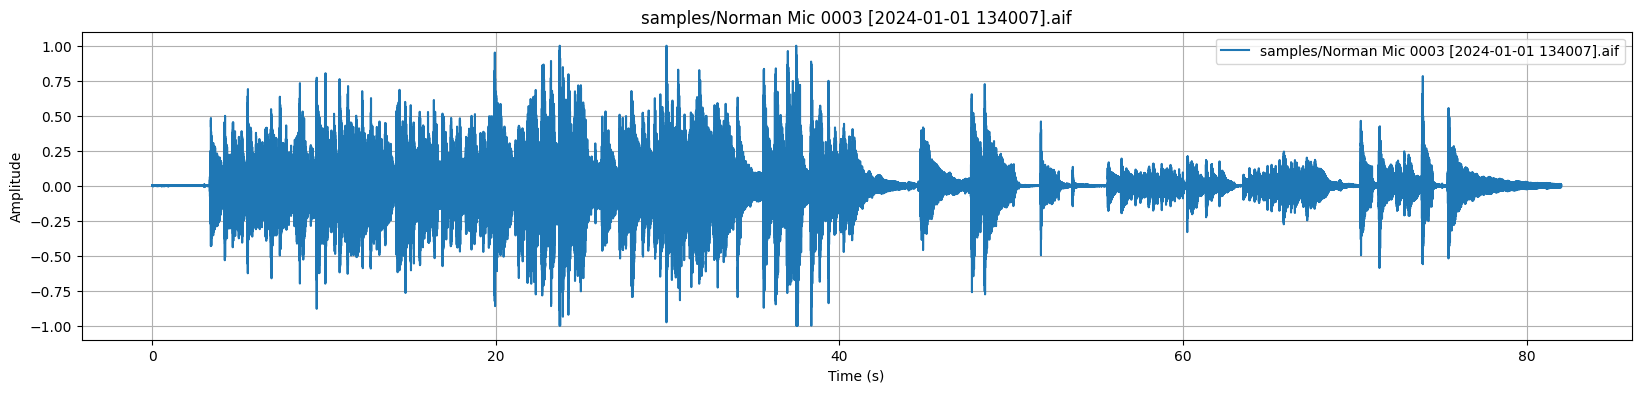

In [28]:
sample = audio.load_sample('samples/Norman piezo 0003 [2024-01-01 134007].aif')
sample2 = audio.load_sample('samples/Norman Mic 0003 [2024-01-01 134007].aif')

plot_signal(sample, label=sample.name)
plot_signal(sample2, label=sample2.name)
plt.legend()

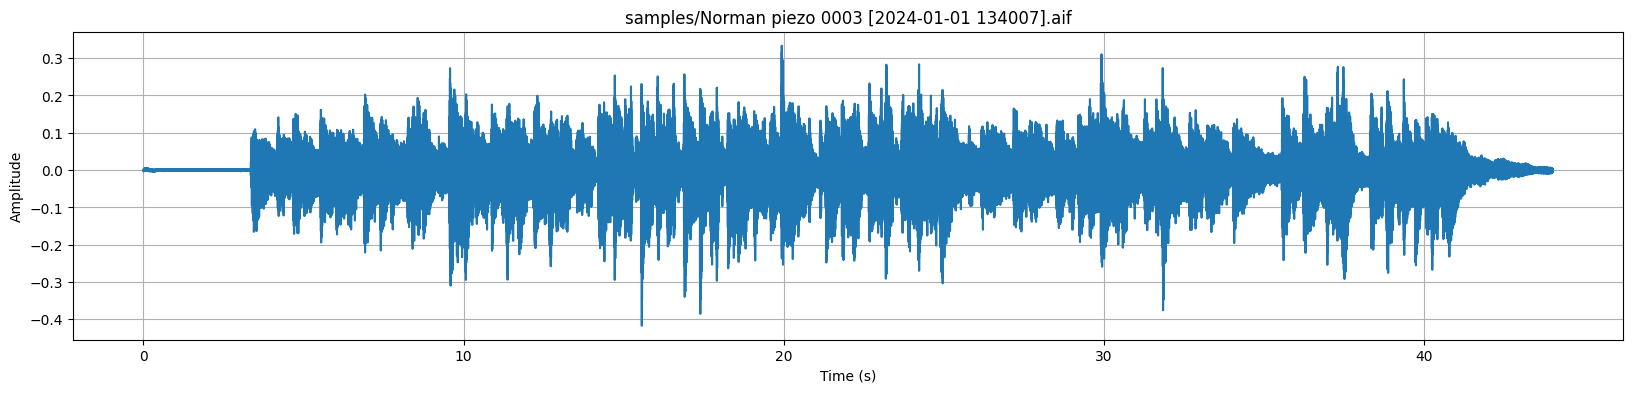

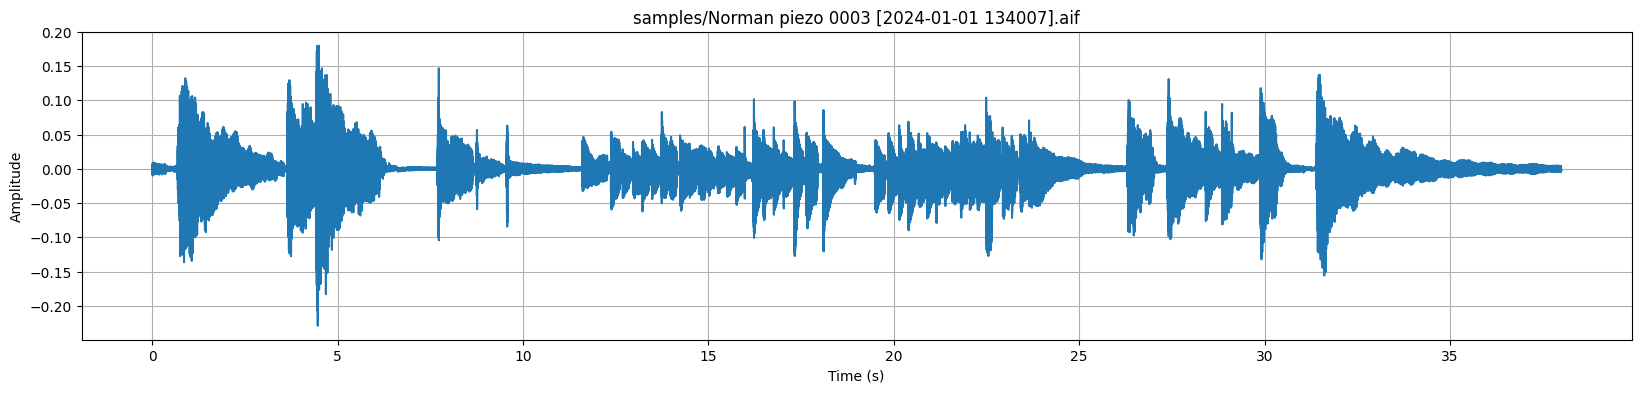

In [64]:
s1, s2 = sample.split_at(44)
plot_signal(s1)
plot_signal(s2)